In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')

In [3]:
from sklearn import datasets

iris= datasets.load_iris()

In [20]:
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)
iris_df['species'] = iris.target

** First glance**

In [21]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
len(iris_df)

150

In [23]:
np.unique(iris_df.species)

array([0, 1, 2])

In [28]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [30]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


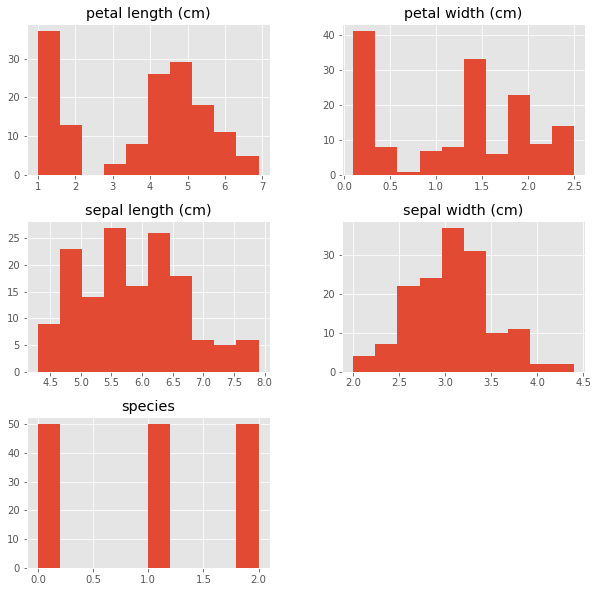

In [48]:
iris_df.hist(figsize=(10,10));

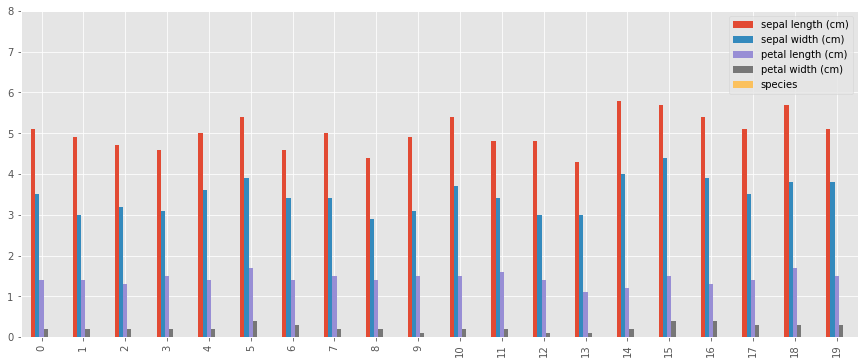

In [60]:
iris_df[:20].plot.bar(figsize=(15,6), ylim=(0,8), legend='best');

In [31]:
corr_mat = iris_df.corr()
corr_mat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [83]:
corr_mat['petal length (cm)'].sort_values(ascending=False)

petal length (cm)    1.000000
petal width (cm)     0.962865
species              0.949035
sepal length (cm)    0.871754
sepal width (cm)    -0.428440
Name: petal length (cm), dtype: float64

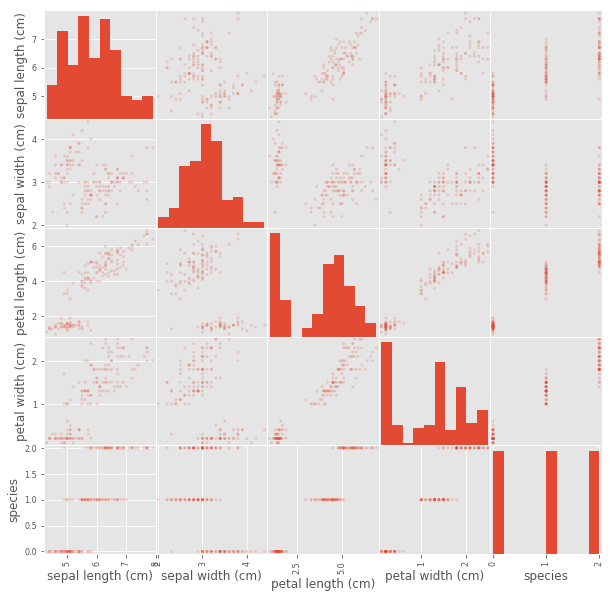

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df, alpha = 0.2, figsize = (10,10));

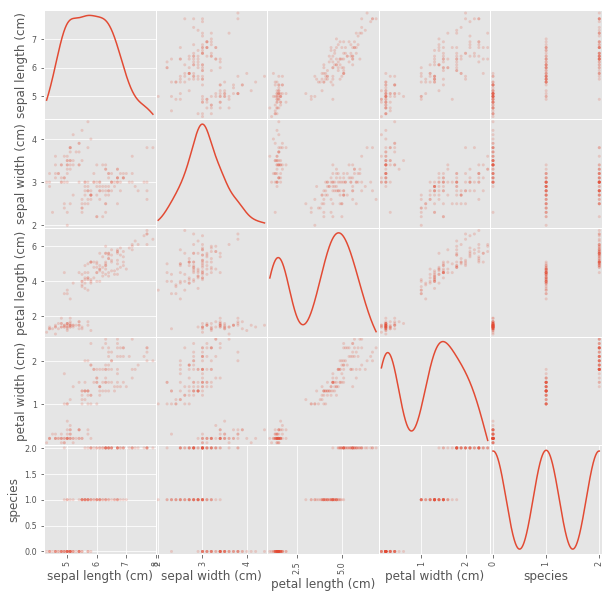

In [62]:
scatter_matrix(iris_df, alpha=0.2, diagonal='kde', figsize=(10,10));

Even better using seaborn :

In [144]:
import seaborn as sns

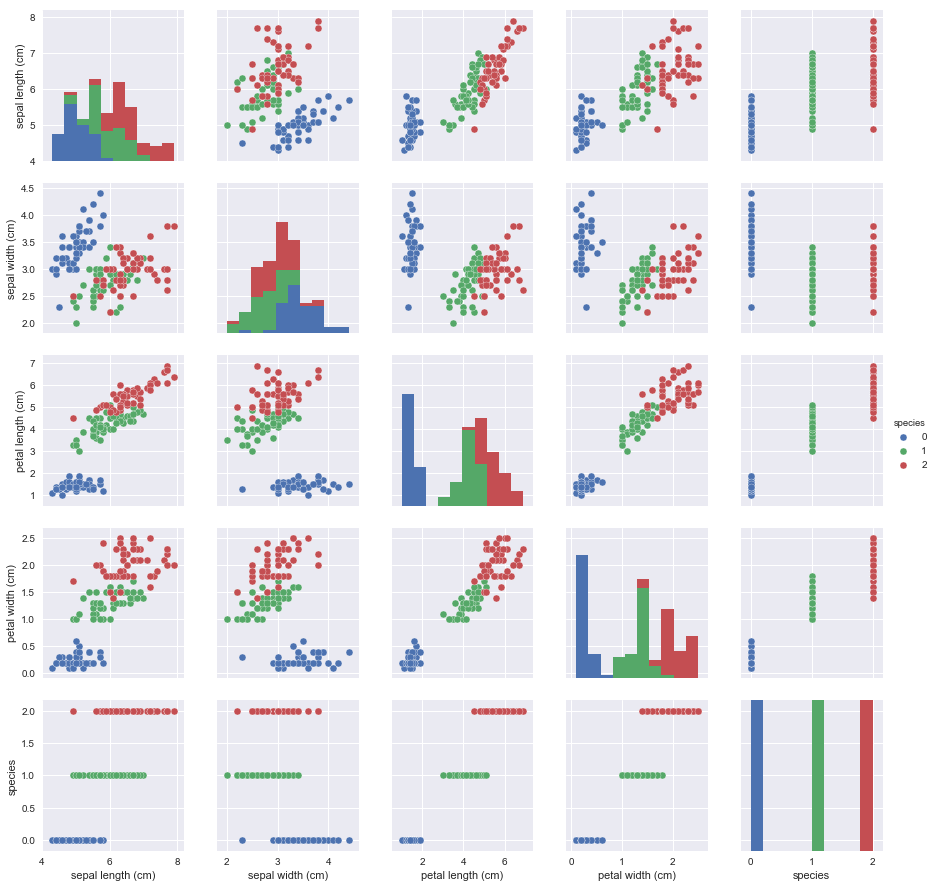

In [145]:
sns.pairplot(iris_df, hue='species');

**Preparing the data**

In [162]:
train_df = iris_df.drop(['species'], axis=1)
targets = iris_df.species.values

In [165]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder  

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

# string categories to integers : LabelEncoder
# integers to one-hot-enc : OneHotEncoder
# string categories to one-hot-enc : OneHotEncoder (or LabelBinarizer)

cat_pipeline = Pipeline([('ohe', OneHotEncoder(categories='auto'))])

In [166]:
X = num_pipeline.fit_transform(train_df)
y = cat_pipeline.fit_transform(targets.reshape(-1,1)) # returns a sparse matrix
y = y.toarray()

In [167]:
print(X[:5])
y[:5]

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [168]:
X_df = pd.DataFrame(X, columns = train_df.columns)

In [169]:
X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


** Dimensionality reduction: PCA**  
(Do StandardScaler first!)

In [193]:
from sklearn.decomposition import PCA

pca_reductor = PCA(n_components=2)
X_pca = pca_reductor.fit_transform(X_df)

pca_df = pd.DataFrame(X_pca, columns=['pc1','pc2'])

In [187]:
pca_reductor.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [188]:
full_pca_df = pd.concat((pca_df, iris_df.species), axis=1)

In [189]:
full_pca_df.head()

,pc1,pc2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


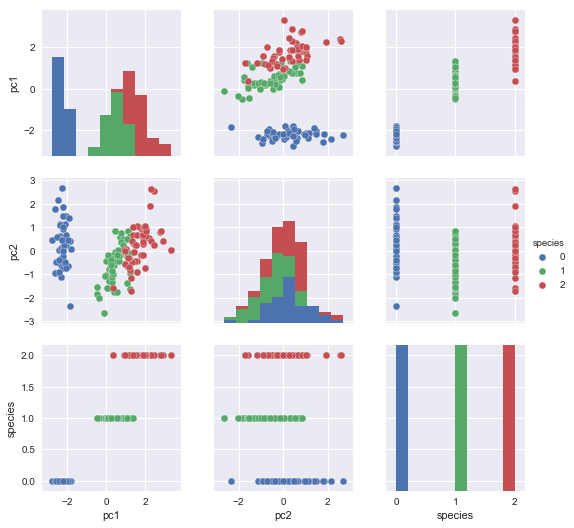

In [190]:
sns.pairplot(full_pca_df, hue='species');

In [191]:
pca_reductor.explained_variance_ratio_

array([0.72962445, 0.22850762])

This means the first component contains 73% of the total variance and the second component 23% (96% for both).

In [196]:
from sklearn.decomposition import KernelPCA

kpca_reductor = KernelPCA(kernel= 'rbf', n_components=2)

X_kpca = kpca_reductor.fit_transform(X_df)

kpca_df = pd.DataFrame(X_kpca,columns = ['kpc1', 'kpc2'])

In [199]:
full_kpca_df = pd.concat((kpca_df,iris_df.species),axis=1)
full_kpca_df.head()

,kpc1,kpc2,species
0,-0.802038,-0.093750,0
1,-0.665623,0.109343,0
2,-0.758616,0.012529,0
3,-0.706189,0.056918,0
4,-0.793607,-0.126192,0


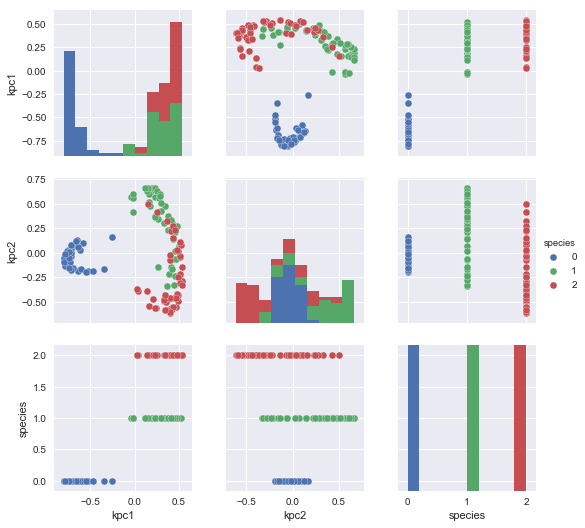

In [201]:
sns.pairplot(full_kpca_df, hue='species');

** Feature selection: VarianceThreshold**

In [124]:
from sklearn.feature_selection import VarianceThreshold

var_selector = VarianceThreshold(threshold=0.)

var_select_array = var_selector.fit_transform(train_df)

var_selector.variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [125]:
train_df.var()  # weird discrepancies!

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [96]:
print(train_df.head())
var_select_array[:5]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2]])

** Feature selection: SelectKBest**

In [173]:
from sklearn.feature_selection import SelectKBest

kbest_selector = SelectKBest(k=2) 
 # The default score function is f_classif for classification. 
 # For regression one must use score_func = f_regression for instance.
X_new = kbest_selector.fit_transform(X_df,targets)

In [178]:
kbest_selector.scores_

array([ 119.26450218,   49.16004009, 1180.16118225,  960.0071468 ])

In [184]:
X_new_df = pd.DataFrame(X_new, columns=X_df.columns[[0,2]])
X_new_df.head()

,sepal length (cm),petal length (cm)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444
